In [17]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [18]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [19]:
x_train.shape

(50000, 32, 32, 3)

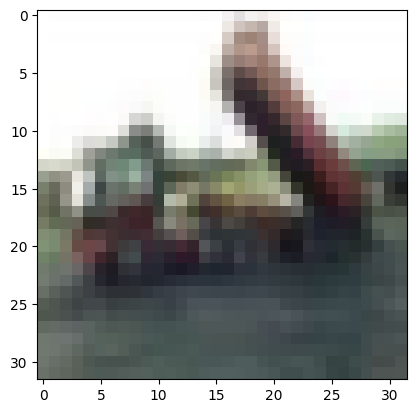

In [20]:
plt.imshow(x_train[2, :, :, :])

In [21]:
images = x_train[1:3, :, :, :]/255.0
images.shape

(2, 32, 32, 3)

In [22]:
filters = np.zeros((5, 5, 3, 2))
filters[:, 2, :, 0] = 1
filters[2, :, :, 1] = 1

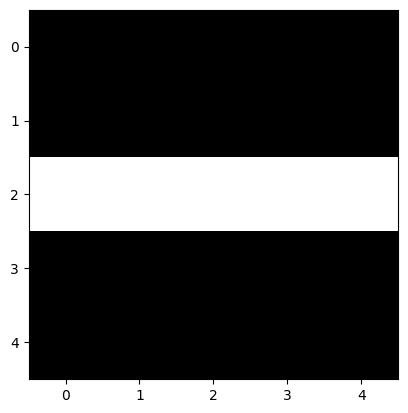

In [23]:
plt.imshow(filters[:, :, :, 1])

In [24]:
convolved_images = tf.nn.conv2d(images, filters, strides=1, padding="SAME")

In [25]:
convolved_images.shape

TensorShape([2, 32, 32, 2])

In [26]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [27]:
x_train, x_test = x_train/255.0, x_test/255.0

In [28]:
x_train.shape

(60000, 28, 28)

In [29]:
model = keras.models.Sequential([
    keras.layers.Conv2D(50, 5, activation="relu",
                         padding="same", input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(100, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(200, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(10, activation="softmax")
])

In [30]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [31]:
model.fit(x_train, y_train, epochs=20, validation_split=0.15)

Epoch 1/20
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 26s 15ms/step - accuracy: 0.6337 - loss: 1.0155 - val_accuracy: 0.8707 - val_loss: 0.3484
Epoch 2/20
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.8555 - loss: 0.4239 - val_accuracy: 0.8866 - val_loss: 0.3116
Epoch 3/20
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.8792 - loss: 0.3502 - val_accuracy: 0.8994 - val_loss: 0.2742
Epoch 4/20
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.8943 - loss: 0.3102 - val_accuracy: 0.9057 - val_loss: 0.2643
Epoch 5/20
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.9042 - loss: 0.2749 - val_accuracy: 0.9089 - val_loss: 0.2495
Epoch 6/20
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.9104 - loss: 0.2583 - val_accuracy: 0.8994 - val_loss: 0.2836
Epoch 7/20
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.9147 - loss: 0.2461 - val_accuracy: 0.9114 - val_loss: 0.2421
Epoch 8/20
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.9209 -